In [1]:
#Gregory Moore Homework 3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Question 1: 
You are given five input features and want to predict the salary based on the features.
x 1 is the experience in data science, x 2 is the experience in math, x3 is the
degree level (1 for graduate and 0 for undergraduate), x 4 is the interaction
between experience in data science and math, x 5 is the interaction
between the experience in data science and degree. Assuming that you
are fitting a linear regression model, with a weight vector being {50, 20,
0.07, 35, 0.01, -10}, answer the following questions:


a) Write the equation of the regression model (2 points)


b) For a fixed value of data science and math experience, what can
you conclude about the salaries of graduate vs undergraduates? (5
points)


c) Since the coefficient of interaction between experience in data
science and math is small, can you say that there is very little
evidence of an interaction effect? Explain your answer. (3 points)

Question 1:

a) f(x) = (50 * x1) + (20 * x2) + (0.07 * x3) + (35 * x1 * x2) + (0.01 * x1 * x3) - 10 

b) For fixed values of data science and math experience, we can conclude that the salaries of graduates are higher than the salaries for undergraduates because the coefficient for the x3 term is positive. This means that when x3=1; i.e. when the person is a graduate student, there is a positive effect on the linear regression.

c) Since the coefficient of interaction is very small that means the interaction term has little effect on the model and therefore little use in predicting future salary. 

# Question 2: 
You sampled 30 people from a population of 100. You are
investigating if the exposure to undergraduate research has an effect on
successful admissions in grad school. The control group of 15 people
didn’t receive undergraduate research experience and the other 15 people
did receive research experience. Carry out analysis to see if there is a
significant difference between the two groups (use a p-value of 0.05).
Control group (mean = 30, std_dev = 6.63); other group (mean = 26,
std_dev = 6.20). (10 points)

Null Hypothesis (Ho): admission for control group = admission for undergrad research group

Alternate Hypothesis (Ha): admission for control group != admission for undergrad research group

In [52]:
control_mean = 30
control_std = 6.63
other_mean = 26
other_std=6.20
control_size = 15
other_size = 15

import math
from scipy.stats import t
t_stat = (control_mean - other_mean)/math.sqrt(((control_std**2)/control_size)+((other_std**2)/other_size))
print('t_stat is ' + str(t_stat))

alpha = 0.05
df = control_size + other_size - 2
print('T-Value at Alpha = 0.025 is ' + str(t.ppf(1-(alpha/2), df=df)))


t_stat is 1.7066724759368215
Test Statistic at Alpha = 0.025 is 2.048407141795244


Since the calculated test statistic is less than T-value, we fail to reject the null hypothesis I can say with 95% confidence that the admission for the control group is not significantly different than admission for the undergrad research group

# Question 3: 
Submit the class exercise (done on 10/16) along with plotting
first 10 steps of the gradient descent in the form of the corresponding
linear regression lines. (20 points)

In [22]:
np.random.seed(42)  # Define a random seed to make this code example reproducible
m = 100  # number of instances
X = np.random.rand(m, 1)  # column vector
y =  1+ 2 * X + np.random.randn(m, 1)  # column vector

In [23]:
from sklearn.preprocessing import add_dummy_feature
##### one line of code here ##### 
X_dummy = add_dummy_feature(X, 1) #adds x0 = 1 to my instances 

In [24]:
### Use least squares way to calculate your best parameters
## theta_best = your code ###
x_transpose = np.transpose(X_dummy)
theta_best = np.dot(np.linalg.inv(np.dot(x_transpose,X_dummy)),np.dot(x_transpose,y))
theta_best #print theta_best
print('y-intercept is ' +str(theta_best[0]))
print('coefficient of X is ' + str(theta_best[1]))

y-intercept is [1.21509616]
coefficient of X is [1.54022677]


In [25]:
#Make a predicton
X_new = np.array ([[0],[1]])
X_new = np.transpose(X_new)
y_pred = np.dot(theta_best, X_new)

Text(0.5, 1.0, 'Data with Predicted Regression Line Manually Calculated')

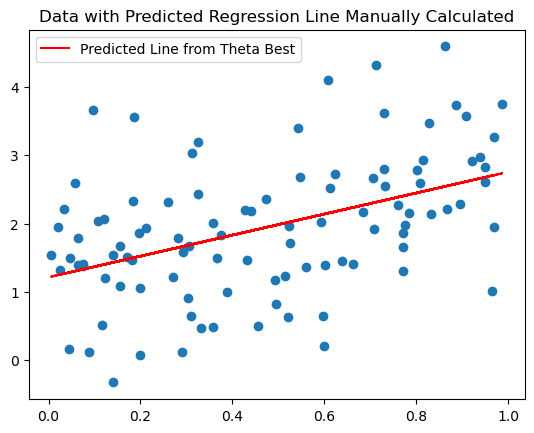

In [26]:
#Plot the scatter plot and my predictions
plt.scatter(X,y)
y_pred = (X*theta_best[1]) + theta_best[0]
plt.plot(X, y_pred, color='red', label='Predicted Line from Theta Best')
plt.legend()
plt.title('Data with Predicted Regression Line Manually Calculated')

Text(0.5, 1.0, 'Manual Predicted Regression Line and .LinearRegression()')

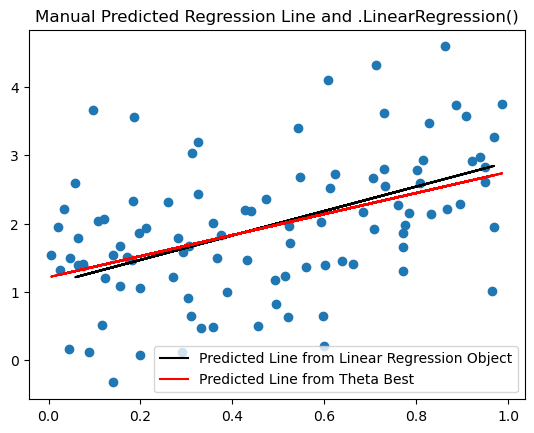

In [28]:
#Method Two: Using Linear Regression Package
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 101)
lin_mod = linear_model.LinearRegression()
lin_mod.fit(X_train, y_train)
y_pred_lm = lin_mod.predict(X_test)
plt.scatter(X,y)
plt.plot(X_test, y_pred_lm, color='black', label='Predicted Line from Linear Regression Object')
plt.plot(X, y_pred, color='red', label='Predicted Line from Theta Best')
plt.legend()
plt.title('Manual Predicted Regression Line and .LinearRegression()')

[array([[0.29382008],
       [1.14761493]]), array([[0.514995  ],
       [1.25848685]]), array([[0.68150897],
       [1.34171544]]), array([[0.80689365],
       [1.40414741]]), array([[0.90133053],
       [1.45093433]]), array([[0.97248037],
       [1.48595229]]), array([[1.02610729],
       [1.51211769]]), array([[1.06654833],
       [1.53162484]]), array([[1.09706679],
       [1.54612476]]), array([[1.12011804],
       [1.55685967]])]


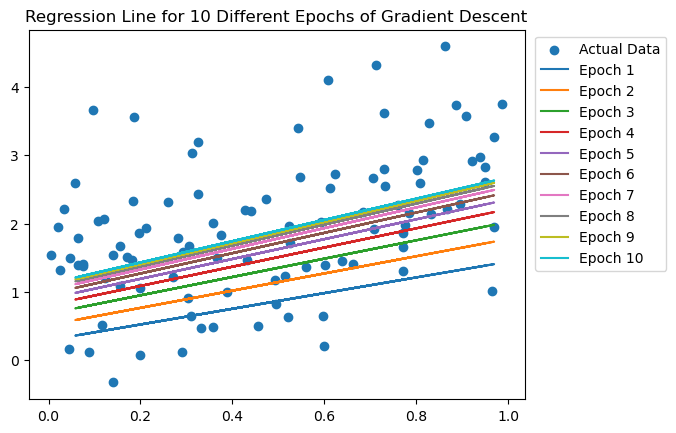

In [30]:
# Part 3- Gradient Descent
r = 0.1  # learning rate
n_epochs = 10 #Number of epochs, defined as 10 
np.random.seed(42) # randomly initialized model parameters

theta_best_epochs = [] 

def grad_desc(X,theta,y,m): #Define a function for the gradient descent according to equation on slide 5
    grad = (2/m)*np.matmul(np.transpose(X),(np.dot(X,theta)-y))
    return grad
theta = [[0],[1]]
for epoch in range(n_epochs):
    grad = grad_desc(X_dummy, theta, y, 100) #Call the gradient descent function and pass it the X_dummy, theta, y values, and m=100.  
    theta = theta - r*grad #Recalculate the theta according to the learning rate and the gradient
    theta_best_epochs.append(theta) #Append the new theta to the list defined outside the for loop

plt.scatter(X,y, label='Actual Data')
y_pred_epoch1 = X_test*theta_best_epochs[0][1]+theta_best_epochs[0][0]
y_pred_epoch2 = X_test*theta_best_epochs[1][1]+theta_best_epochs[1][0]
y_pred_epoch3 = X_test*theta_best_epochs[2][1]+theta_best_epochs[2][0]
y_pred_epoch4 = X_test*theta_best_epochs[3][1]+theta_best_epochs[3][0]
y_pred_epoch5 = X_test*theta_best_epochs[4][1]+theta_best_epochs[4][0]
y_pred_epoch6 = X_test*theta_best_epochs[5][1]+theta_best_epochs[5][0]
y_pred_epoch7 = X_test*theta_best_epochs[6][1]+theta_best_epochs[6][0]
y_pred_epoch8 = X_test*theta_best_epochs[7][1]+theta_best_epochs[7][0]
y_pred_epoch9 = X_test*theta_best_epochs[8][1]+theta_best_epochs[8][0]
y_pred_epoch10 = X_test*theta_best_epochs[9][1]+theta_best_epochs[9][0]

#X_test
plt.plot(X_test, y_pred_epoch1,label='Epoch 1')
plt.plot(X_test, y_pred_epoch2,label='Epoch 2')
plt.plot(X_test, y_pred_epoch3,label='Epoch 3')
plt.plot(X_test, y_pred_epoch4,label='Epoch 4')
plt.plot(X_test, y_pred_epoch5,label='Epoch 5')
plt.plot(X_test, y_pred_epoch6,label='Epoch 6')
plt.plot(X_test, y_pred_epoch7,label='Epoch 7')
plt.plot(X_test, y_pred_epoch8,label='Epoch 8')
plt.plot(X_test, y_pred_epoch9,label='Epoch 9')
plt.plot(X_test, y_pred_epoch10,label='Epoch 10')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.title('Regression Line for 10 Different Epochs of Gradient Descent')

#Print theta computed from gradient descent
print(theta_best_epochs)